In [48]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [49]:
G=(lambda x1, x2, x3, x4: x1**2+x2**2+x3**2+x4**2-1,)


In [50]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2],r[3])
        
    return v

In [51]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [52]:
GetMetric(G,(0,1,2,3))

84.5

In [53]:
def GetJacobian(G,r,h=1e-6):
    
    
        J = np.zeros((1,4))
    
        J[0,0] = (  G[0](r[0]+h,r[1],r[2],r[3]) - G[0](r[0]-h,r[1],r[2],r[3]) )/(2*h)
        J[0,1] = (  G[0](r[0],r[1]+h,r[2],r[3]) - G[0](r[0],r[1]-h,r[2],r[3]) )/(2*h)
        J[0,2] = (  G[0](r[0],r[1],r[2]+h,r[3]) - G[0](r[0],r[1],r[2]-h,r[3]) )/(2*h)
        J[0,3] =(  G[0](r[0],r[1],r[2],r[3]+h) - G[0](r[0],r[1],r[2],r[3]-h) )/(2*h)
        
        return J.T

In [55]:
def vector_rand():
    vector=np.random.uniform(low = -1, high = 1, size = 4)
    return vector

In [56]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
            
        it += 1
        
    return r

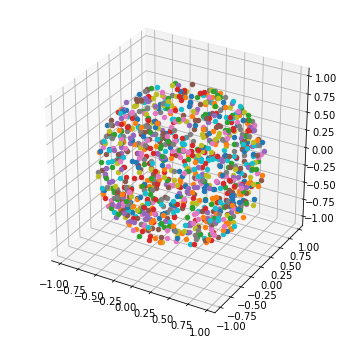

In [58]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')
vectores=[]
for i in range(0,1000):
    r=vector_rand()
    vector=GetSolve(G,r)
    ax.scatter(vector[0],vector[1],vector[2])